In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
import matplotlib.pyplot as plt

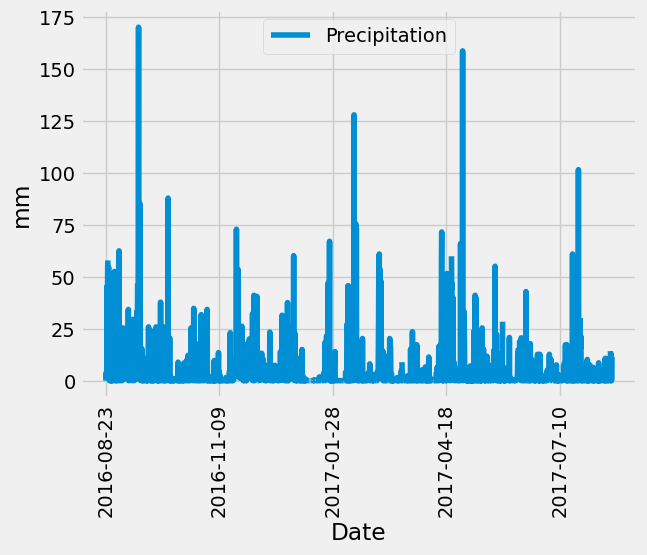

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date>=query_date_12_months).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=["Date", "Precipitation"])
precipitation_df.set_index("Date", inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values("Date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.ylabel("mm")
plt.xticks(rotation=90)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_num = session.query(station.station).count()
print(station_num)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activate_station_list = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

activate_station_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()[0]
#most_active_station
temps_most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
        filter(measurement.station == most_active_station).all()
temps_most_active

[(12.2, 29.4, 22.03582251082252)]

USC00519281


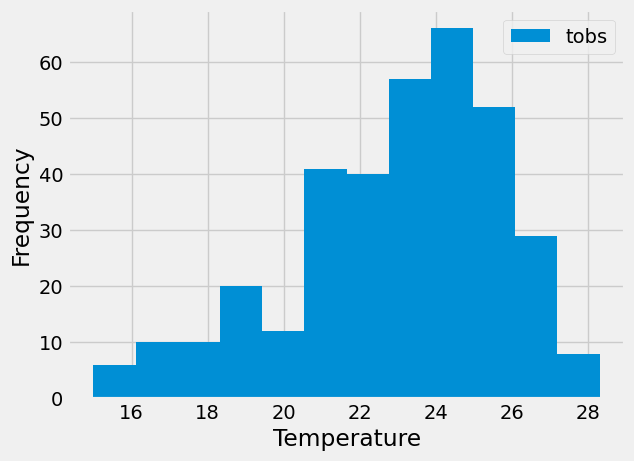

In [19]:
# Using the most active station id
most_active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()[0]
print(most_active_station)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)

temps = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
        filter(measurement.date > query_date_12_months).\
        order_by(measurement.date).all()


temps_df = pd.DataFrame(temps, columns=["Temperature"])
plt.hist(temps_df["Temperature"], bins=12)
plt.legend(["tobs"], loc="best")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


# Close Session

In [17]:
# Close Session
session.close()